In [ ]:
# read data
data = read.csv("kaggle_survey_2020_responses.csv")
head(data)

,Time.from.Start.to.Finish..seconds.,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,⋯,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,⋯,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
2,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,⋯,,,,TensorBoard,,,,,,
3,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,⋯,,,,,,,,,,
4,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,,,,⋯,,,,,,,,,None,
5,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,,SQL,⋯,,,,,,,,,,
6,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,,,⋯,,,,,,,,,,


In [ ]:
# first remove those row titles so it won't show up in plots
data_sliced = data[which(data$Q1 != 'What is your age (# years)?'),]
head(data_sliced)

,Time.from.Start.to.Finish..seconds.,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,⋯,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,⋯,,,,TensorBoard,,,,,,
3,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,⋯,,,,,,,,,,
4,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,,,,⋯,,,,,,,,,None,
5,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,,SQL,⋯,,,,,,,,,,
6,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,,,⋯,,,,,,,,,,
7,401,30-34,Man,India,Bachelor’s degree,Data Analyst,< 1 years,Python,R,,⋯,,,,,,,,,,


In [ ]:
install.packages("DescTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# install tidyverse
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Exploratory data analysis

In [ ]:
# genders: frequency bar chart, a density chart is seen in beginning of Q2 code

# let's look at the different genders recorded in the table
gender_counts = data_sliced %>% count(Q2)
gender_counts

Q2,n
<chr>,<int>
Man,15789
Nonbinary,52
Prefer not to say,263
Prefer to self-describe,54
Woman,3878


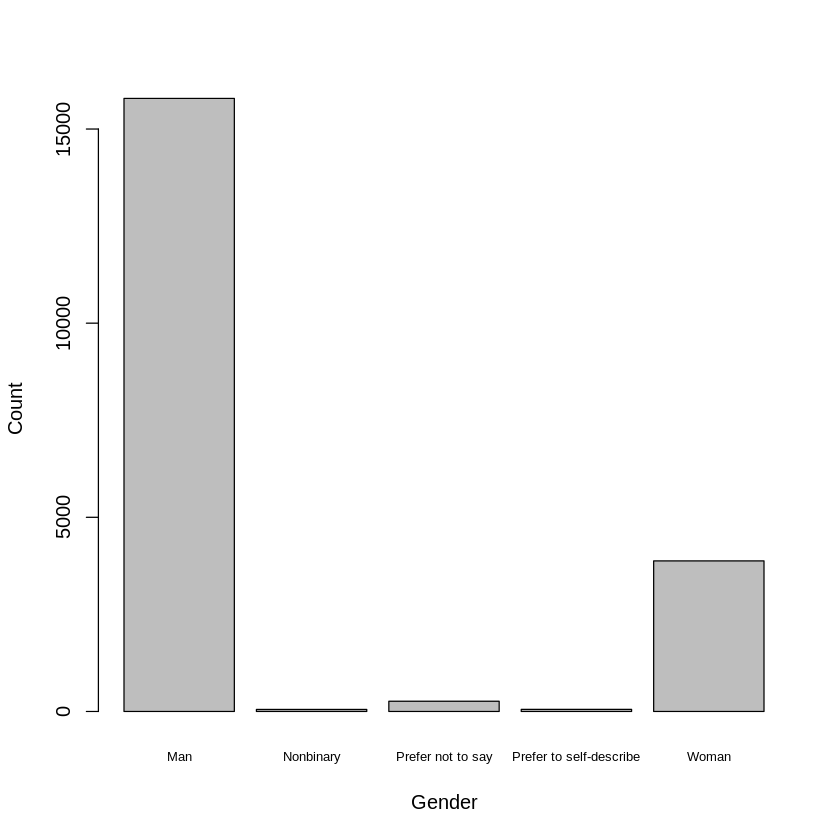

In [ ]:
barplot(height = gender_counts$n, names.arg = gender_counts$Q2, cex.names = 0.65, xlab = "Gender", ylab = "Count")

In [ ]:
# install graphics
#library(graphics)

Q1,n
<chr>,<int>
18-21,3469
22-24,3786
25-29,4011
30-34,2811
35-39,1991
40-44,1397
45-49,988
50-54,698
55-59,411


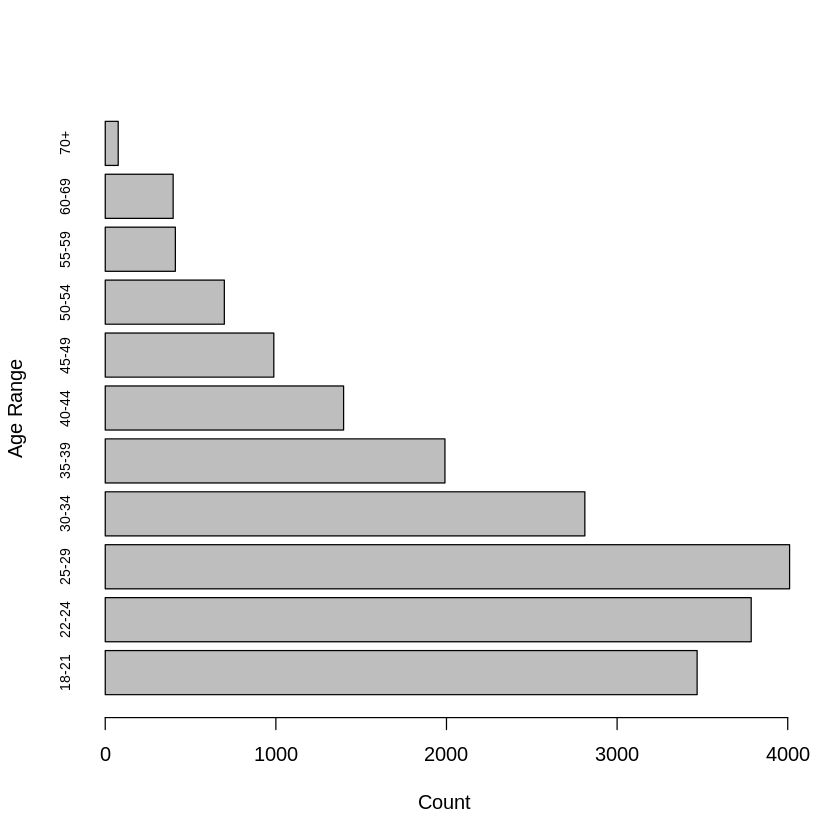

In [ ]:
# ages: horizontal bar frequency chart
age_counts = data_sliced %>% count(Q1)
age_counts
barplot(age_counts$n, horiz = T, names.arg = age_counts$Q1, cex.names = 0.7, xlab = "Count", ylab = "Age Range")

In [ ]:
# level of education: bar frequency chart
# use colors & a legend instead of individual labels
education_counts = data_sliced %>% count(Q4)
education_counts

Q4,n
<chr>,<int>
,467
Bachelor’s degree,6978
Doctoral degree,2302
I prefer not to answer,399
Master’s degree,7859
No formal education past high school,240
Professional degree,699
Some college/university study without earning a bachelor’s degree,1092


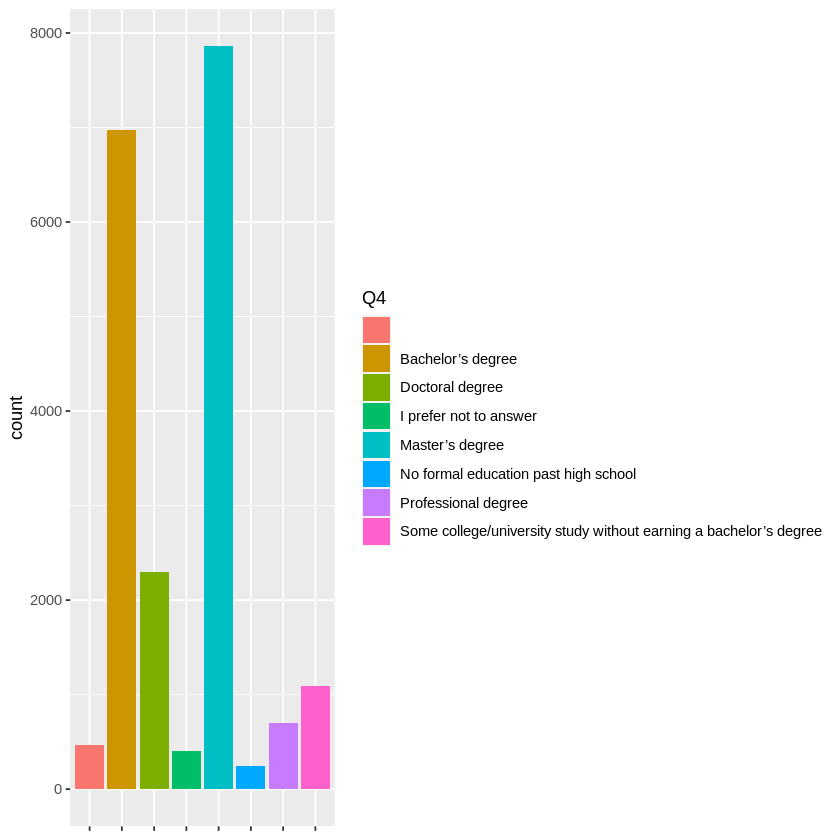

In [ ]:
# reminder that this is a frequency chart, not a density chart
# partly because of the blank label: some people abstained: how can you translate that to a density chart?
ggplot(data = data_sliced, aes(Q4, fill = Q4)) + geom_bar() + theme(axis.text.x = element_blank(),
axis.title.x = element_blank())

In [ ]:
# country of residence: no graphic here
country_counts = data_sliced %>% count(Q3)

country_proportions = prop.table(country_counts$n)
country_counts$proportion = country_proportions
country_counts[order(-country_counts$n),]

,Q3,n
,<chr>,<int>
16,India,5851
54,United States of America,2237
30,Other,1388
6,Brazil,694
22,Japan,638
38,Russia,582
53,United Kingdom of Great Britain and Northern Ireland,489
29,Nigeria,476
9,China,474


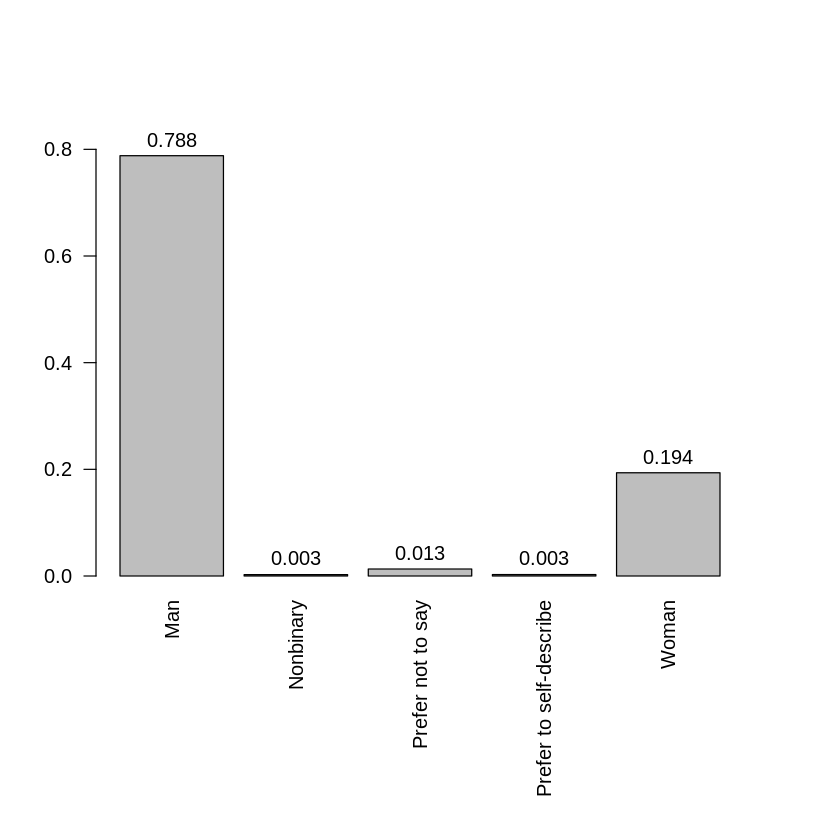

In [ ]:
#distribution of gender
par(mar=c(11,4,4,4))
x = barplot(prop.table(table(data$Q2[2:20037])), las=2, ylim=c(0, 0.9))
y = c(round(prop.table(table(data$Q2[2:20037])), 3))
text(x,y+0.03,labels=c(round(prop.table(table(data$Q2[2:20037])), 3)))

In [ ]:
install.packages("countrycode")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(countrycode)

In [ ]:
df = data.frame(table(data$Q3[2:20037]))
df$continent <- countrycode(sourcevar = df$Var1,
                            origin = "country.name",
                            destination = "continent")

Warning message in countrycode(sourcevar = df$Var1, origin = "country.name", destination = "continent"):
“Some values were not matched unambiguously: Other
”


In [ ]:
df = df %>% rename(country = Var1, count = Freq)
df

country,count,continent
<fct>,<int>,<chr>
Argentina,134,Americas
Australia,231,Oceania
Bangladesh,143,Asia
Belarus,59,Europe
Belgium,60,Europe
Brazil,694,Americas
Canada,301,Americas
Chile,85,Americas
China,474,Asia


In [ ]:
df_remove_others = df[!(df$country == "Other"),]
df_remove_others

,country,count,continent
,<fct>,<int>,<chr>
1,Argentina,134,Americas
2,Australia,231,Oceania
3,Bangladesh,143,Asia
4,Belarus,59,Europe
5,Belgium,60,Europe
6,Brazil,694,Americas
7,Canada,301,Americas
8,Chile,85,Americas
9,China,474,Asia


In [ ]:
asia = df_remove_others[df_remove_others$continent == "Asia",]
asia_count = sum(asia$count)
americas = df_remove_others[df_remove_others$continent == "Americas",]
americas_count = sum(americas$count)
europe = df_remove_others[df_remove_others$continent == "Europe",]
europe_count = sum(europe$count)
africa = df_remove_others[df_remove_others$continent == "Africa",]
africa_count = sum(africa$count)
oceania = df_remove_others[df_remove_others$continent == "Oceania",]
oceania_count = sum(oceania$count)
other = df[df$country == "Other",]$count
continent_count = c(asia_count, americas_count, europe_count, africa_count, oceania_count, other)
continent = c("Asia", "Americas", "Europe", "Africa", "Oceania", "Other")
continent_table = data.frame(continent, continent_count)
continent_table 

continent,continent_count
<chr>,<int>
Asia,9744
Americas,3950
Europe,3490
Africa,1233
Oceania,231
Other,1388


In [ ]:
continent_table$continent_prop = prop.table(continent_count)

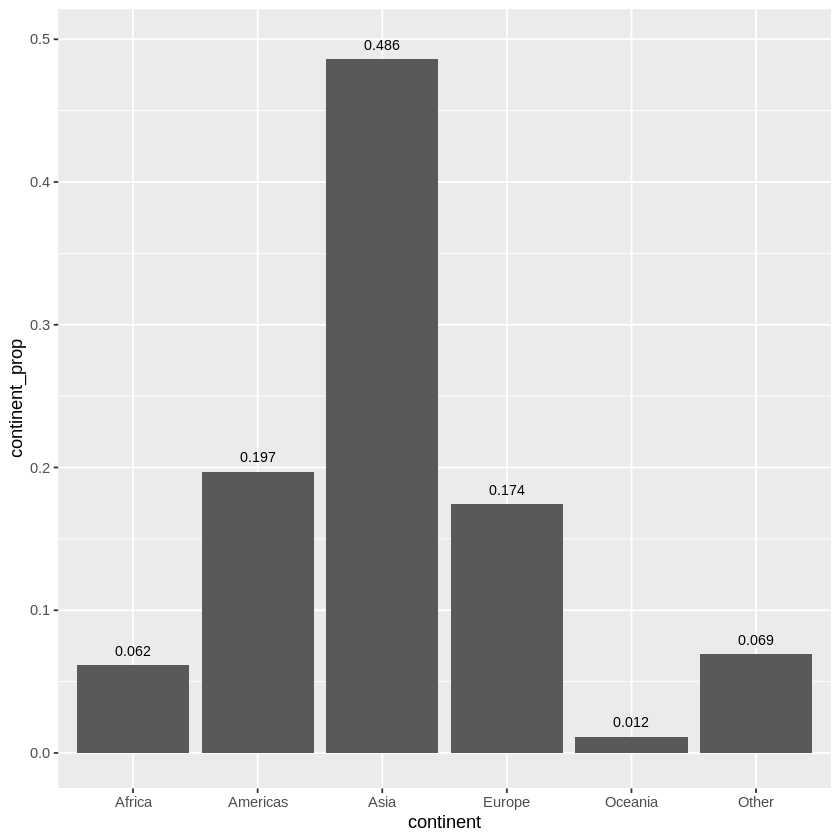

In [ ]:
#distribution of data scientist & machine learning engineer by continent
ggplot(continent_table, aes(x = continent, y = continent_prop)) + 
geom_bar(stat="identity") +
geom_text(stat = "identity", nudge_y = 0.01, size = 3, aes(label = round(continent_prop, 3)))

# Separating newly experienced and highly experienced individuals based on years of programming

,Q6,n
,<chr>,<int>
6,3-5 years,4546
3,1-2 years,4505
2,< 1 years,3313
7,5-10 years,2552
4,10-20 years,1751
5,20+ years,1329
8,I have never written code,1124
1,,916


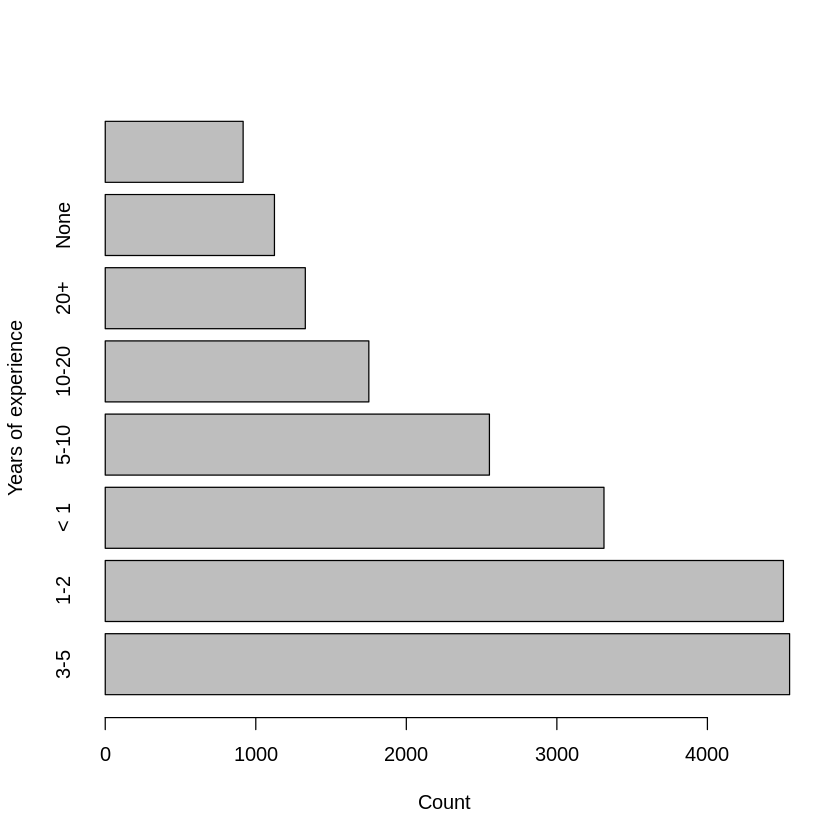

In [ ]:
# visualize the years of programming experience
experience_counts = data_sliced %>% count(Q6)
experience_counts = experience_counts[order(-experience_counts$n),]
experience_counts
experience_labels = c("3-5", "1-2", "< 1", "5-10", "10-20", "20+", "None", "")
barplot(experience_counts$n, horiz = T, names.arg = experience_labels, xlab = "Count", ylab = "Years of experience")

In [ ]:
# select all columns with Q7
q7_responses = select(data_sliced, contains("Q7"))
head(q7_responses)

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,Python,R,SQL,C,,,Javascript,,,,MATLAB,,Other
3,Python,R,SQL,,,,,,,,,,
4,,,,,,Java,Javascript,,,Bash,,,
5,Python,,SQL,,,,,,,Bash,,,
6,Python,,,,,,,,,,,,
7,Python,R,,,,,,,,,,,


In [ ]:
#there's got to be a better way to do this, but...
python_count = sum(q7_responses$Q7_Part_1 != "")
r_count = sum(q7_responses$Q7_Part_2 != "")
sql_count = sum(q7_responses$Q7_Part_3 != "")
c_count = sum(q7_responses$Q7_Part_4 != "")
cpp_count = sum(q7_responses$Q7_Part_5 != "")
java_count = sum(q7_responses$Q7_Part_6 != "")
javascript_count = sum(q7_responses$Q7_Part_7 != "")
julia_count = sum(q7_responses$Q7_Part_8 != "")
swift_count = sum(q7_responses$Q7_Part_9 != "")
bash_count = sum(q7_responses$Q7_Part_10 != "")
matlab_count = sum(q7_responses$Q7_Part_11 != "")
none_count = sum(q7_responses$Q7_Part_12 != "")
other_count = sum(q7_responses$Q7_OTHER != "")
q7_counts_vector = c(python_count,r_count,sql_count,c_count,cpp_count,java_count,javascript_count,julia_count,
swift_count,bash_count,matlab_count,none_count,other_count)

In [ ]:
q7_labels = c('Python', 'R', 'SQL', 'C', 'C++', 'Java',
'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None',
'Other')

q7_counts = data.frame(language = q7_labels,count = q7_counts_vector)
q7_counts = q7_counts[order(-q7_counts$count),]
q7_counts

,language,count
,<chr>,<int>
1,Python,15530
3,SQL,7535
2,R,4277
5,C++,3827
6,Java,3367
4,C,3315
7,Javascript,2995
11,MATLAB,2217
13,Other,1945


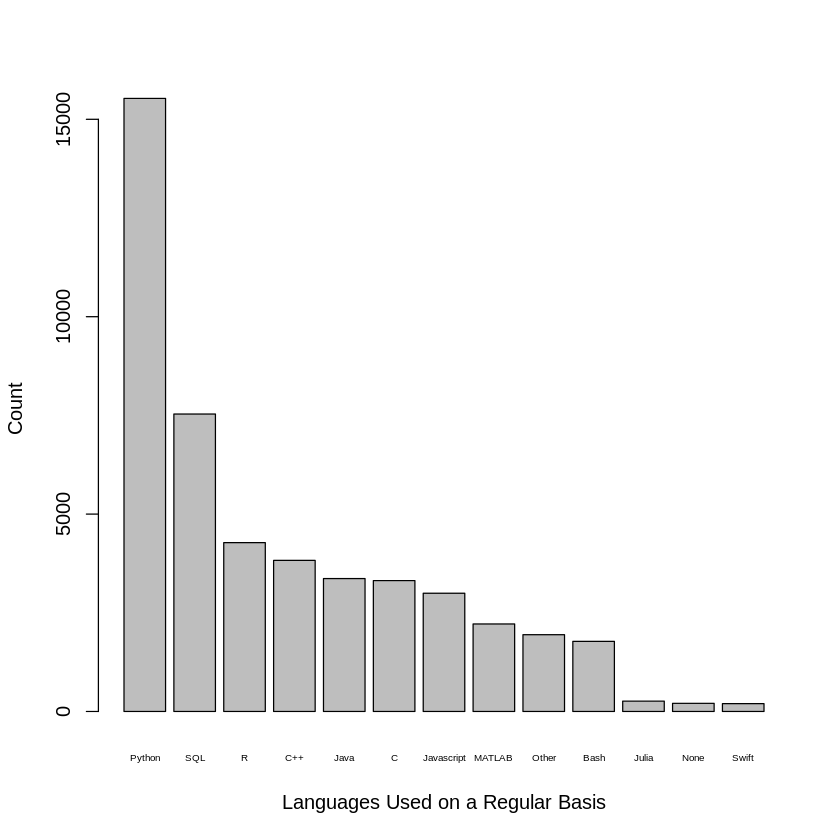

In [ ]:
barplot(height = q7_counts$count, names.arg = q7_counts$language, cex.names = 0.49, xlab = "Languages Used on a Regular Basis", ylab = "Count")

In [ ]:
# ok now to actually answer the question

# get all the people with equal or less than 5 years of experience
newly_experienced = data_sliced[which(data_sliced$Q6 == '< 1 years' | data_sliced$Q6 == '1-2 years' | data_sliced$Q6 == '3-5 years'),]
head(newly_experienced)

# get all the people with more than 5 years of experience; the blank/0 years of experience are not counted
highly_experienced = data_sliced[which(data_sliced$Q6 == '5-10 years' | data_sliced$Q6 == '10-20 years' | data_sliced$Q6 == '20+ years'),]
head(highly_experienced)

,Time.from.Start.to.Finish..seconds.,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,⋯,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,,,⋯,,,,,,,,,,
7,401,30-34,Man,India,Bachelor’s degree,Data Analyst,< 1 years,Python,R,,⋯,,,,,,,,,,
8,748,22-24,Man,Brazil,Bachelor’s degree,Student,3-5 years,Python,R,,⋯,,,,,,,,,,
9,171196,25-29,Woman,China,Master’s degree,Student,< 1 years,,R,,⋯,,,,,,,,,,
11,150,22-24,Man,China,No formal education past high school,Student,< 1 years,Python,,SQL,⋯,,,,,,,,,,
12,7469,18-21,Man,India,Bachelor’s degree,Student,1-2 years,Python,R,SQL,⋯,,,,,,,,,,


,Time.from.Start.to.Finish..seconds.,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,⋯,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,⋯,,,,TensorBoard,,,,,,
3,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,⋯,,,,,,,,,,
4,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,,,,⋯,,,,,,,,,None,
5,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,,SQL,⋯,,,,,,,,,,
10,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,,SQL,⋯,,,,,,,,,,
26,571,50-54,Man,United States of America,Master’s degree,Software Engineer,20+ years,Python,,,⋯,,,,,,,,,None,


In [ ]:
cat("Number of newly experienced data scientists: ", nrow(newly_experienced))
cat("\nNumber of highly experienced data scientists: ", nrow(highly_experienced))

In [ ]:
newly_experienced_counts_q5 = newly_experienced %>% count(Q5)
highly_experienced_counts_q5 = highly_experienced %>% count(Q5)

nec_q5_proportions = prop.table(newly_experienced_counts_q5$n)
newly_experienced_counts_q5$proportion = nec_q5_proportions
newly_experienced_counts_q5[order(-newly_experienced_counts_q5$n),]

,Q5,n
,<chr>,<int>
13,Student,4469
5,Data Scientist,1450
2,Currently not employed,1205
3,Data Analyst,1068
8,Other,970
11,Software Engineer,881
7,Machine Learning Engineer,664
1,Business Analyst,496
10,Research Scientist,455


In [ ]:
hec_q5_proportions = prop.table(highly_experienced_counts_q5$n)
highly_experienced_counts_q5$proportion = hec_q5_proportions
highly_experienced_counts_q5[order(-highly_experienced_counts_q5$n),]

,Q5,n
,<chr>,<int>
5,Data Scientist,1162
11,Software Engineer,1051
10,Research Scientist,657
8,Other,536
7,Machine Learning Engineer,383
13,Student,365
9,Product/Project Manager,315
3,Data Analyst,296
2,Currently not employed,277


In [ ]:
newly_experienced_counts_q21 = newly_experienced %>% count(Q21)

nec_q21_proportions = prop.table(newly_experienced_counts_q21$n)
newly_experienced_counts_q21$proportion = nec_q21_proportions
newly_experienced_counts_q21[order(-newly_experienced_counts_q21$n),]

,Q21,n
,<chr>,<int>
1,,6393
3,01-Feb,1491
2,0,1386
7,20+,1010
4,03-Apr,943
5,05-Sep,662
8,Oct-14,336
6,15-19,143


In [ ]:
highly_experienced_counts_q21 = highly_experienced %>% count(Q21)

hec_q21_proportions = prop.table(highly_experienced_counts_q21$n)
highly_experienced_counts_q21$proportion = hec_q21_proportions
highly_experienced_counts_q21[order(-highly_experienced_counts_q21$n),]

,Q21,n
,<chr>,<int>
7,20+,1136
3,01-Feb,1031
1,,940
4,03-Apr,766
2,0,683
5,05-Sep,608
8,Oct-14,322
6,15-19,146


In [ ]:
newly_experienced_counts_q22 = newly_experienced %>% count(Q22)

nec_q22_proportions = prop.table(newly_experienced_counts_q22$n)
newly_experienced_counts_q22$proportion = nec_q22_proportions
newly_experienced_counts_q22[order(-newly_experienced_counts_q22$n),]

,Q22,n
,<chr>,<int>
1,,6489
4,We are exploring ML methods (and may one day put a model into production),1336
3,No (we do not use ML methods),1249
2,I do not know,952
6,"We recently started using ML methods (i.e., models in production for less than 2 years)",916
5,"We have well established ML methods (i.e., models in production for more than 2 years)",756
7,We use ML methods for generating insights (but do not put working models into production),666


In [ ]:
highly_experienced_counts_q22 = highly_experienced %>% count(Q22)

hec_q22_proportions = prop.table(highly_experienced_counts_q22$n)
highly_experienced_counts_q22$proportion = hec_q22_proportions
highly_experienced_counts_q22[order(-highly_experienced_counts_q22$n),]

,Q22,n
,<chr>,<int>
5,"We have well established ML methods (i.e., models in production for more than 2 years)",1125
1,,973
4,We are exploring ML methods (and may one day put a model into production),917
6,"We recently started using ML methods (i.e., models in production for less than 2 years)",849
3,No (we do not use ML methods),756
7,We use ML methods for generating insights (but do not put working models into production),550
2,I do not know,462


# Chi-square test to determine if annual income is dependent on programming experience

In [ ]:
#taking two tables from Q3: newly_experienced and highly_experienced
#first look into Q24:yearly compensation (in USD) and Q37:learning platforms
newly_experienced_simplified = select(newly_experienced, contains("Q6"), contains("Q24"))
newly_experienced_simplified

#remove blank inputs
newly_experienced_q24 = newly_experienced_simplified[!(newly_experienced_simplified$Q24 == ""),]
newly_experienced_q24

,Q6,Q24,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6,3-5 years,,,,,,,,,,,,,
7,< 1 years,,,,,,,,,,,,,
8,3-5 years,,Coursera,,,,Fast.ai,Udacity,Udemy,,,,,
9,< 1 years,,,,,,,,,,,,,
11,< 1 years,,,,,,,,,,,,,
12,1-2 years,,,,,,,,,,,,,
13,1-2 years,"30,000-39,999",,,,,,,,,,,None,
14,< 1 years,,,,Kaggle Learn Courses,DataCamp,,,,,,University Courses (resulting in a university degree),,
15,< 1 years,"90,000-99,999",Coursera,,Kaggle Learn Courses,DataCamp,,,Udemy,,,,,


In [ ]:
highly_experienced
#look into Q24:yearly compensation (in USD)
highly_experienced_simplified = select(highly_experienced, contains("Q6"), contains("Q24"))
highly_experienced_simplified

#remove blank inputs
highly_experienced_q24 = highly_experienced_simplified[!(highly_experienced_simplified$Q24 == ""),]
highly_experienced_q24

,Time.from.Start.to.Finish..seconds.,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,⋯,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,⋯,,,,TensorBoard,,,,,,
3,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,⋯,,,,,,,,,,
4,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,,,,⋯,,,,,,,,,None,
5,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,,SQL,⋯,,,,,,,,,,
10,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,,SQL,⋯,,,,,,,,,,
26,571,50-54,Man,United States of America,Master’s degree,Software Engineer,20+ years,Python,,,⋯,,,,,,,,,None,
30,545,30-34,Man,Netherlands,Bachelor’s degree,Software Engineer,10-20 years,Python,,,⋯,,,,,,,,,,
32,1028,35-39,Woman,Pakistan,Master’s degree,Data Analyst,5-10 years,Python,R,SQL,⋯,,,,,,,,,,
34,459,30-34,Man,Other,Doctoral degree,Machine Learning Engineer,10-20 years,Python,,,⋯,,,,,,,,,,


,Q6,Q24,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,5-10 years,,Coursera,,Kaggle Learn Courses,,,,,,,University Courses (resulting in a university degree),,
3,5-10 years,"100,000-124,999",Coursera,,,DataCamp,,,Udemy,,,,,
4,10-20 years,"15,000-19,999",Coursera,edX,,,,Udacity,Udemy,,,,,
5,5-10 years,"125,000-149,999",Coursera,,,DataCamp,,,,LinkedIn Learning,,University Courses (resulting in a university degree),,
10,5-10 years,"70,000-79,999",Coursera,,,,Fast.ai,Udacity,Udemy,LinkedIn Learning,,,,
26,20+ years,"150,000-199,999",,,,,,,,,"Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",,,Other
30,10-20 years,"60,000-69,999",Coursera,,Kaggle Learn Courses,,Fast.ai,,,,,University Courses (resulting in a university degree),,
32,5-10 years,"15,000-19,999",Coursera,,Kaggle Learn Courses,DataCamp,,Udacity,Udemy,LinkedIn Learning,,University Courses (resulting in a university degree),,
34,10-20 years,"10,000-14,999",,,,,,,,,,,None,


,Q6,Q24,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,5-10 years,"100,000-124,999",Coursera,,,DataCamp,,,Udemy,,,,,
4,10-20 years,"15,000-19,999",Coursera,edX,,,,Udacity,Udemy,,,,,
5,5-10 years,"125,000-149,999",Coursera,,,DataCamp,,,,LinkedIn Learning,,University Courses (resulting in a university degree),,
10,5-10 years,"70,000-79,999",Coursera,,,,Fast.ai,Udacity,Udemy,LinkedIn Learning,,,,
26,20+ years,"150,000-199,999",,,,,,,,,"Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",,,Other
30,10-20 years,"60,000-69,999",Coursera,,Kaggle Learn Courses,,Fast.ai,,,,,University Courses (resulting in a university degree),,
32,5-10 years,"15,000-19,999",Coursera,,Kaggle Learn Courses,DataCamp,,Udacity,Udemy,LinkedIn Learning,,University Courses (resulting in a university degree),,
34,10-20 years,"10,000-14,999",,,,,,,,,,,None,
43,5-10 years,$0-999,,,,,,,,,,University Courses (resulting in a university degree),,


In [ ]:
newly_experienced_count_q24 = newly_experienced_q24 %>% count(Q24)
newly_experienced_count_q24

Q24,n
<chr>,<int>
"> $500,000",17
$0-999,1522
"1,000-1,999",370
"10,000-14,999",392
"100,000-124,999",174
"125,000-149,999",84
"15,000-19,999",234
"150,000-199,999",75
"2,000-2,999",210


In [ ]:
highly_experienced_count_q24 = highly_experienced_q24 %>% count(Q24)
highly_experienced_count_q24

Q24,n
<chr>,<int>
"> $500,000",30
$0-999,428
"1,000-1,999",158
"10,000-14,999",232
"100,000-124,999",381
"125,000-149,999",226
"15,000-19,999",185
"150,000-199,999",268
"2,000-2,999",102


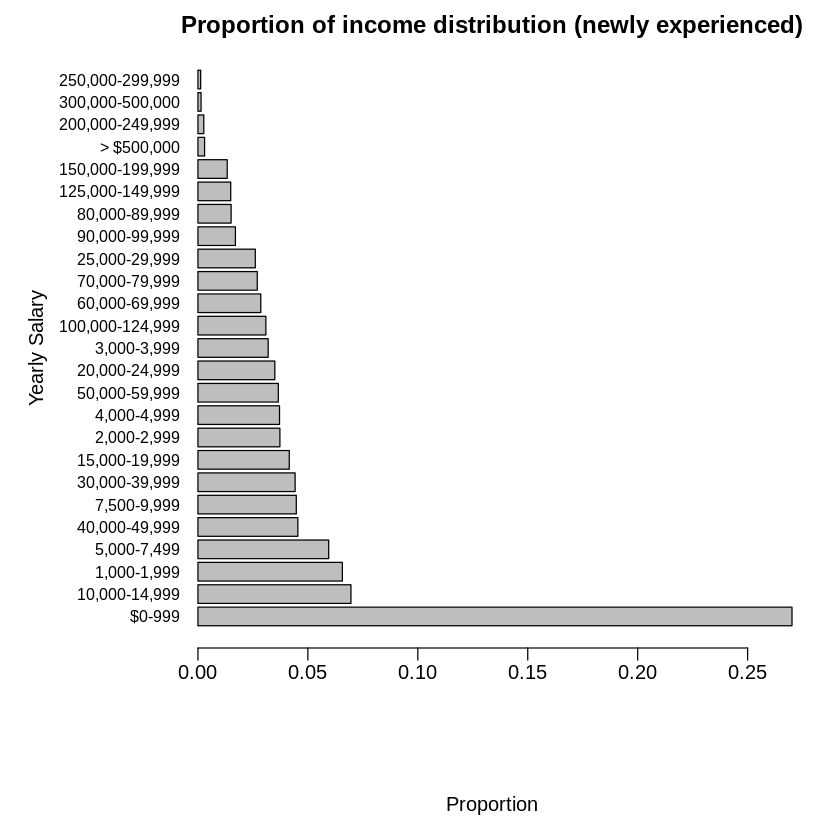

In [ ]:
#visualize the proportional distribution of yearly pay
newly_experienced_count_q24$prop = prop.table(newly_experienced_count_q24$n)
newly_experienced_count_q24 = newly_experienced_count_q24[order(-newly_experienced_count_q24$prop),]
par(mar = c(8,8, 2, 2), mgp = c(6, 0.5, 0))
barplot(newly_experienced_count_q24$prop, horiz = T, names.arg = newly_experienced_count_q24$Q24, main = "Proportion of income distribution (newly experienced)", xlab = "Proportion", ylab = "Yearly Salary", las=1, cex.names = 0.8)

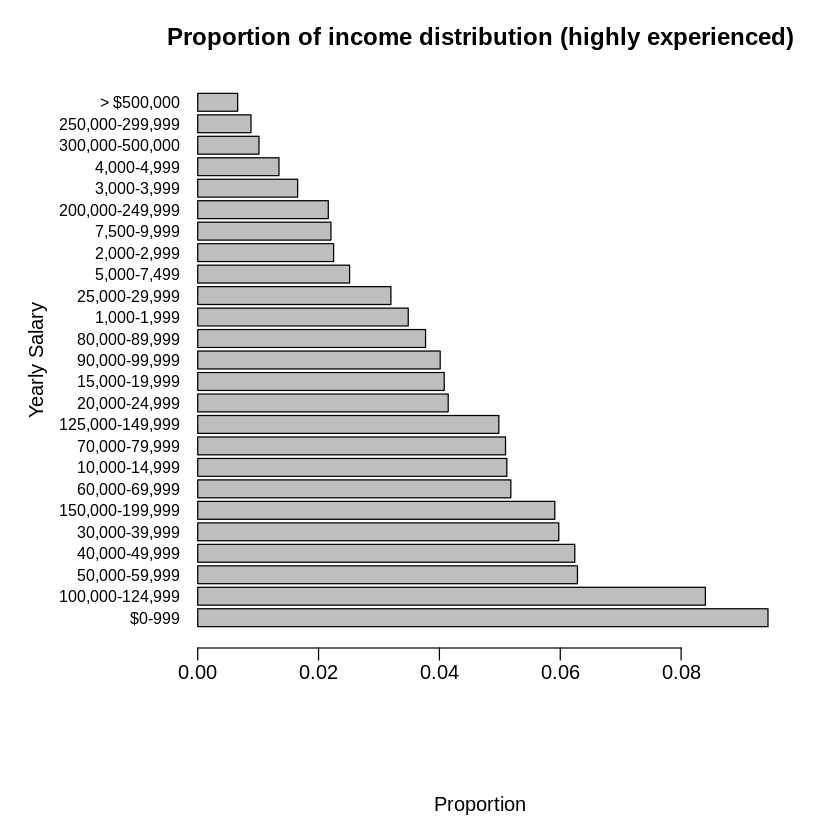

In [ ]:
#visualize the proportional distribution of yearly pay
highly_experienced_count_q24$prop = prop.table(highly_experienced_count_q24$n)
highly_experienced_count_q24 = highly_experienced_count_q24[order(-highly_experienced_count_q24$prop),]
par(mar = c(8,8, 3, 3), mgp = c(6, 0.5, 0))
barplot(highly_experienced_count_q24$prop, horiz = T, names.arg = highly_experienced_count_q24$Q24, main = "Proportion of income distribution (highly experienced)", xlab = "Proportion", ylab = "Yearly Salary", las=1, cex.names = 0.8)

In [ ]:
merged_salary_count_and_prop = merge(highly_experienced_count_q24, newly_experienced_count_q24, by.x = "Q24", by.y = "Q24")
merged_salary_count_and_prop = merged_salary_count_and_prop %>% rename(yearly_pay = Q24, highly_experienced = n.x, newly_experienced = n.y)
merged_salary_count = select(merged_salary_count_and_prop, yearly_pay, highly_experienced, newly_experienced)
merged_salary_count

yearly_pay,highly_experienced,newly_experienced
<chr>,<int>,<int>
"> $500,000",30,17
$0-999,428,1522
"1,000-1,999",158,370
"10,000-14,999",232,392
"100,000-124,999",381,174
"125,000-149,999",226,84
"15,000-19,999",185,234
"150,000-199,999",268,75
"2,000-2,999",102,210


In [ ]:
merged_salary_count_and_prop

yearly_pay,highly_experienced,prop.x,newly_experienced,prop.y
<chr>,<int>,<dbl>,<int>,<dbl>
"> $500,000",30,0.006615215,17,0.003017930
$0-999,428,0.094377067,1522,0.270193503
"1,000-1,999",158,0.034840132,370,0.065684360
"10,000-14,999",232,0.051157663,392,0.069589917
"100,000-124,999",381,0.084013230,174,0.030889402
"125,000-149,999",226,0.049834620,84,0.014912125
"15,000-19,999",185,0.040793826,234,0.041540920
"150,000-199,999",268,0.059095921,75,0.013314397
"2,000-2,999",102,0.022491731,210,0.037280312


In [ ]:
#lets put the data in table format for chi-square test
count = rbind(c(merged_salary_count$highly_experienced), c(merged_salary_count$newly_experienced))
count_table <- matrix(count,ncol=2,byrow=TRUE)
colnames(count_table) <- c("highly_experienced", "newly_experienced")
rownames(count_table) <- c(merged_salary_count$yearly_pay)
count_table <- as.table(count_table)
count_table

                highly_experienced newly_experienced
> $500,000                      30                17
$0-999                         428              1522
1,000-1,999                    158               370
10,000-14,999                  232               392
100,000-124,999                381               174
125,000-149,999                226                84
15,000-19,999                  185               234
150,000-199,999                268                75
2,000-2,999                    102               210
20,000-24,999                  188               197
200,000-249,999                 98                15
25,000-29,999                  145               147
250,000-299,999                 40                 7
3,000-3,999                     75               180
30,000-39,999                  271               249
300,000-500,000                 46                 8
4,000-4,999                     61               209
40,000-49,999                  283            

In [ ]:
#perform chi-square test to see if the yearly pay follows a specific distribution
chisq.test(count_table, correct = FALSE)


	Pearson's Chi-squared test

data:  count_table
X-squared = 1446.3, df = 24, p-value < 2.2e-16


We have a high chi-square value (1446.3) and a very low p-value which is below the significance level of 0.01

With that, we reject the null hypothesis as there is insufficient evidence to conclude that the yearly salary is independent of programming experience level

In [ ]:
#Contingency coefficient
ContCoef(count_table, correct = FALSE)

[1] 0.3528793

In [ ]:
#Corrected contingency coefficient
ContCoef(count_table, correct = TRUE)

[1] 0.4990467

# Advanced Analysis: Determine the strength of association between annual income and level of education, as well as between annual income and programming experience

Level of education

In [ ]:
all_q24 = data[!(data$Q24 == ""),]

#get columns Q24 and Q4
all_q24_q4 = select(all_q24, Q24, Q4)

#get people with yearly salary above $90,000
a_avg = all_q24_q4[which(all_q24_q4$Q24 == "90,000-99,999" | all_q24_q4$Q24 == "100,000-124,999" | all_q24_q4$Q24 == "125,000-149,999"
| all_q24_q4$Q24 == "150,000-199,999" | all_q24_q4$Q24 == "200,000-249,999" | all_q24_q4$Q24 == "250,000-299,999"
| all_q24_q4$Q24 == "300,000-500,000" | all_q24_q4$Q24 == "> $500,000"),]
a_avg
b_avg = all_q24_q4[which(!(all_q24_q4$Q24 == "What is your current yearly compensation (approximate $USD)?" 
| all_q24_q4$Q24 == "90,000-99,999" | all_q24_q4$Q24 == "100,000-124,999" | all_q24_q4$Q24 == "125,000-149,999"
| all_q24_q4$Q24 == "150,000-199,999" | all_q24_q4$Q24 == "200,000-249,999" | all_q24_q4$Q24 == "250,000-299,999"
| all_q24_q4$Q24 == "300,000-500,000" | all_q24_q4$Q24 == "> $500,000")),]
b_avg

,Q24,Q4
,<chr>,<chr>
3,"100,000-124,999",Master’s degree
5,"125,000-149,999",Master’s degree
15,"90,000-99,999",Bachelor’s degree
24,"125,000-149,999",Master’s degree
26,"150,000-199,999",Master’s degree
36,"125,000-149,999",Bachelor’s degree
41,"> $500,000",Bachelor’s degree
53,"125,000-149,999",Master’s degree
54,"300,000-500,000",Master’s degree


,Q24,Q4
,<chr>,<chr>
1,What is your current yearly compensation (approximate $USD)?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
4,"15,000-19,999",Bachelor’s degree
10,"70,000-79,999",Doctoral degree
13,"30,000-39,999",Doctoral degree
16,"70,000-79,999",Bachelor’s degree
22,"1,000-1,999",Doctoral degree
23,$0-999,Bachelor’s degree
25,"10,000-14,999",Some college/university study without earning a bachelor’s degree
30,"60,000-69,999",Bachelor’s degree


In [ ]:
a_avg_edu_simplified = a_avg[which(a_avg$Q4 == "Bachelor’s degree" | a_avg$Q4 == "Doctoral degree"
| a_avg$Q4 == "Master’s degree" | a_avg$Q4 == "Professional degree"),]
a_avg_edu_simplified_count = a_avg_edu_simplified %>% count(Q4)
a_avg_edu_simplified_count = a_avg_edu_simplified_count[order(-a_avg_edu_simplified_count$n),]

In [ ]:
b_avg_edu_simplified = b_avg[which(b_avg$Q4 == "Bachelor’s degree" | b_avg$Q4 == "Doctoral degree"
| b_avg$Q4 == "Master’s degree" | b_avg$Q4 == "Professional degree"),]
b_avg_edu_simplified_count = b_avg_edu_simplified %>% count(Q4)
b_avg_edu_simplified_count = b_avg_edu_simplified_count[order(-b_avg_edu_simplified_count$n),]

In [ ]:
a_avg_edu_simplified_count$prop = prop.table(a_avg_edu_simplified_count$n)
b_avg_edu_simplified_count$prop = prop.table(b_avg_edu_simplified_count$n)

In [ ]:
#lets create a merged table
merged_edu = merge(a_avg_edu_simplified_count, b_avg_edu_simplified_count, by.x = "Q4", by.y = "Q4")
merged_edu = merged_edu %>% rename(a_count = n.x, b_count = n.y, a_prop = prop.x, b_prop = prop.y)
merged_edu

Q4,a_count,a_prop,b_count,b_prop
<chr>,<int>,<dbl>,<int>,<dbl>
Bachelor’s degree,340,0.19894675,2673,0.31931669
Doctoral degree,425,0.24868344,1293,0.15446183
Master’s degree,878,0.51375073,4001,0.47795962
Professional degree,66,0.03861908,404,0.04826186


In [ ]:
a_avg_edu_count = c(a_avg_edu_simplified_count$n[4], a_avg_edu_simplified_count$n[3], a_avg_edu_simplified_count$n[1], a_avg_edu_simplified_count$n[2])
b_avg_edu_count = c(b_avg_edu_simplified_count$n[4], b_avg_edu_simplified_count$n[2], b_avg_edu_simplified_count$n[1], b_avg_edu_simplified_count$n[3])
edu_count = c(a_avg_edu_count, b_avg_edu_count)

In [ ]:
edu_count_table <- matrix(edu_count,ncol=4,byrow=TRUE)
colnames(edu_count_table) <- c("Professional degree", "Bachelor’s degree", "Master’s degree" , "Doctoral degree")
rownames(edu_count_table) <- c("above_avg", "below_avg")
edu_count_table <- as.table(edu_count_table)
edu_count_table

          Professional degree Bachelor’s degree Master’s degree Doctoral degree
above_avg                  66               340             878             425
below_avg                 404              2673            4001            1293

In [ ]:
library(DescTools)

In [ ]:
CochranArmitageTest(edu_count_table, alternative = c("increasing"))


	Cochran-Armitage test for trend

data:  edu_count_table
Z = 11.312, dim = 4, p-value = 1
alternative hypothesis: increasing


In [ ]:
CochranArmitageTest(edu_count_table, alternative = c("decreasing"))


	Cochran-Armitage test for trend

data:  edu_count_table
Z = 11.312, dim = 4, p-value < 2.2e-16
alternative hypothesis: decreasing


In [ ]:
CochranArmitageTest(edu_count_table, alternative = c("two.sided"))


	Cochran-Armitage test for trend

data:  edu_count_table
Z = 11.312, dim = 4, p-value < 2.2e-16
alternative hypothesis: two.sided


In [ ]:
cramerV(edu_count_table, bias.correct = FALSE)

Cramer V 
  0.1217

In [ ]:
cramerV(edu_count_table, bias.correct = TRUE)

Cramer V 
  0.1205

Programming Experience: Coefficient using Chi-Square statistics

In [ ]:
install.packages("rcompanion")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘multcomp’, ‘zoo’, ‘multcompView’, ‘plyr’, ‘coin’, ‘lmtest’, ‘nortest’




In [ ]:
library(rcompanion)

In [ ]:
cramerV(count_table, bias.correct = FALSE)

Cramer V 
  0.3771

In [ ]:
cramerV(count_table, bias.correct = TRUE)

Cramer V 
   0.374

Test for 2 by 2 table, simplified version
- Years of experience
- Education level

In [ ]:
highly_experienced_count_q24

,Q24,n,prop
,<chr>,<int>,<dbl>
2,$0-999,428,0.094377067
5,"100,000-124,999",381,0.084013230
20,"50,000-59,999",285,0.062844542
18,"40,000-49,999",283,0.062403528
15,"30,000-39,999",271,0.059757442
8,"150,000-199,999",268,0.059095921
21,"60,000-69,999",235,0.051819184
4,"10,000-14,999",232,0.051157663
23,"70,000-79,999",231,0.050937155


In [ ]:
#get people with yearly salary above $90,000
highly_a_avg = highly_experienced_count_q24[which(highly_experienced_count_q24$Q24 == "90,000-99,999" | highly_experienced_count_q24$Q24 == "100,000-124,999" 
| highly_experienced_count_q24$Q24 == "125,000-149,999"
| highly_experienced_count_q24$Q24 == "150,000-199,999" | highly_experienced_count_q24$Q24 == "200,000-249,999" 
| highly_experienced_count_q24$Q24 == "250,000-299,999"
| highly_experienced_count_q24$Q24 == "300,000-500,000" | highly_experienced_count_q24$Q24 == "> $500,000"),]
highly_a_av
highly_b_avg = highly_experienced_count_q24[which(!(highly_experienced_count_q24$Q24 == "90,000-99,999" 
| highly_experienced_count_q24$Q24 == "100,000-124,999" | highly_experienced_count_q24$Q24 == "125,000-149,999"
| highly_experienced_count_q24$Q24 == "150,000-199,999" | highly_experienced_count_q24$Q24 == "200,000-249,999" 
| highly_experienced_count_q24$Q24 == "250,000-299,999"
| highly_experienced_count_q24$Q24 == "300,000-500,000" | highly_experienced_count_q24$Q24 == "> $500,000")),]
highly_b_avg

,Q24,n,prop
,<chr>,<int>,<dbl>
5,"100,000-124,999",381,0.084013230
8,"150,000-199,999",268,0.059095921
6,"125,000-149,999",226,0.049834620
25,"90,000-99,999",182,0.040132304
11,"200,000-249,999",98,0.021609702
16,"300,000-500,000",46,0.010143330
13,"250,000-299,999",40,0.008820287
1,"> $500,000",30,0.006615215


,Q24,n,prop
,<chr>,<int>,<dbl>
2,$0-999,428,0.09437707
20,"50,000-59,999",285,0.06284454
18,"40,000-49,999",283,0.06240353
15,"30,000-39,999",271,0.05975744
21,"60,000-69,999",235,0.05181918
4,"10,000-14,999",232,0.05115766
23,"70,000-79,999",231,0.05093716
10,"20,000-24,999",188,0.04145535
7,"15,000-19,999",185,0.04079383


In [ ]:
highly_a_avg_count = sum(highly_a_avg$n)
highly_a_avg_prop = sum(highly_a_avg$prop)
highly_b_avg_count = sum(highly_b_avg$n)
highly_b_avg_prop = sum(highly_b_avg$prop)

In [ ]:
#get people with yearly salary above $90,000
newly_a_avg = newly_experienced_count_q24[which(newly_experienced_count_q24$Q24 == "90,000-99,999" 
| newly_experienced_count_q24$Q24 == "100,000-124,999" 
| newly_experienced_count_q24$Q24 == "125,000-149,999"
| newly_experienced_count_q24$Q24 == "150,000-199,999" | newly_experienced_count_q24$Q24 == "200,000-249,999" 
| newly_experienced_count_q24$Q24 == "250,000-299,999"
| newly_experienced_count_q24$Q24 == "300,000-500,000" | newly_experienced_count_q24$Q24 == "> $500,000"),]
newly_a_avg
newly_b_avg = newly_experienced_count_q24[which(!(newly_experienced_count_q24$Q24 == "90,000-99,999" 
| newly_experienced_count_q24$Q24 == "100,000-124,999" | newly_experienced_count_q24$Q24 == "125,000-149,999"
| newly_experienced_count_q24$Q24 == "150,000-199,999" | newly_experienced_count_q24$Q24 == "200,000-249,999" 
| newly_experienced_count_q24$Q24 == "250,000-299,999"
| newly_experienced_count_q24$Q24 == "300,000-500,000" | newly_experienced_count_q24$Q24 == "> $500,000")),]
newly_b_avg

,Q24,n,prop
,<chr>,<int>,<dbl>
5,"100,000-124,999",174,0.030889402
25,"90,000-99,999",96,0.017042429
6,"125,000-149,999",84,0.014912125
8,"150,000-199,999",75,0.013314397
1,"> $500,000",17,0.003017930
11,"200,000-249,999",15,0.002662879
16,"300,000-500,000",8,0.001420202
13,"250,000-299,999",7,0.001242677


,Q24,n,prop
,<chr>,<int>,<dbl>
2,$0-999,1522,0.27019350
4,"10,000-14,999",392,0.06958992
3,"1,000-1,999",370,0.06568436
19,"5,000-7,499",335,0.05947097
18,"40,000-49,999",256,0.04544648
22,"7,500-9,999",252,0.04473637
15,"30,000-39,999",249,0.04420380
7,"15,000-19,999",234,0.04154092
9,"2,000-2,999",210,0.03728031


In [ ]:
newly_a_avg_count = sum(newly_a_avg$n)
newly_a_avg_prop = sum(newly_a_avg$prop)
newly_b_avg_count = sum(newly_b_avg$n)
newly_b_avg_prop = sum(newly_b_avg$prop)

In [ ]:
new_count = c(newly_b_avg_count, highly_b_avg_count, newly_a_avg_count, highly_a_avg_count)
new_count_table <- matrix(new_count,ncol=2,byrow=TRUE)
colnames(new_count_table) <- c("newly_experienced", "highly_experienced")
rownames(new_count_table) <- c("below_avg", "above_avg")
new_count_table <- as.table(new_count_table)
new_count_table

          newly_experienced highly_experienced
below_avg              5157               3264
above_avg               476               1271

In [ ]:
chisq.test(new_count_table, correct = FALSE)


	Pearson's Chi-squared test

data:  new_count_table
X-squared = 676.64, df = 1, p-value < 2.2e-16


In [ ]:
phi(new_count_table, digits = 3)

phi 
0.258

In [ ]:
merged_edu

Q4,a_count,a_prop,b_count,b_prop
<chr>,<int>,<dbl>,<int>,<dbl>
Bachelor’s degree,340,0.19894675,2673,0.31931669
Doctoral degree,425,0.24868344,1293,0.15446183
Master’s degree,878,0.51375073,4001,0.47795962
Professional degree,66,0.03861908,404,0.04826186


In [ ]:
#separate into above masters and below masters
merged_below_masters = merged_edu[which(merged_edu$Q4 == "Bachelor’s degree" | merged_edu$Q4 == "Professional degree"),]
merged_above_masters = merged_edu[which(!(merged_edu$Q4 == "Bachelor’s degree" | merged_edu$Q4 == "Professional degree")),]

In [ ]:
merged_below_masters

,Q4,a_count,a_prop,b_count,b_prop
,<chr>,<int>,<dbl>,<int>,<dbl>
1,Bachelor’s degree,340,0.19894675,2673,0.31931669
4,Professional degree,66,0.03861908,404,0.04826186


In [ ]:
merged_above_masters

,Q4,a_count,a_prop,b_count,b_prop
,<chr>,<int>,<dbl>,<int>,<dbl>
2,Doctoral degree,425,0.2486834,1293,0.1544618
3,Master’s degree,878,0.5137507,4001,0.4779596


In [ ]:
merged_below_masters_a_avg = sum(merged_below_masters$a_count)
merged_below_masters_b_avg = sum(merged_below_masters$b_count)
merged_above_masters_a_avg = sum(merged_above_masters$a_count)
merged_above_masters_b_avg = sum(merged_above_masters$b_count)

In [ ]:
new_edu_count = c(merged_below_masters_a_avg, merged_above_masters_a_avg, merged_below_masters_b_avg, merged_above_masters_b_avg)

In [ ]:
new_edu_count_table <- matrix(new_edu_count,ncol=2,byrow=TRUE)
colnames(new_edu_count_table) <- c("below_masters", "above_masters")
rownames(new_edu_count_table) <- c("above_avg", "below_avg")
new_edu_count_table <- as.table(new_edu_count_table)
new_edu_count_table

          below_masters above_masters
above_avg           406          1303
below_avg          3077          5294

In [ ]:
chisq.test(new_edu_count_table, correct = FALSE)


	Pearson's Chi-squared test

data:  new_edu_count_table
X-squared = 106.08, df = 1, p-value < 2.2e-16


In [ ]:
phi(new_edu_count_table, digits = 3)

phi 
-0.103

Tools to master

In [ ]:
#get columns Q24 and Q38
all_q24_q38 = select(all_q24, Q24, Q38)

#get people with yearly salary above $90,000
tools_a_avg = all_q24_q38[which(all_q24_q38$Q24 == "90,000-99,999" | all_q24_q38$Q24 == "100,000-124,999" 
| all_q24_q38$Q24 == "125,000-149,999"
| all_q24_q38$Q24 == "150,000-199,999" | all_q24_q38$Q24 == "200,000-249,999" | all_q24_q38$Q24 == "250,000-299,999"
| all_q24_q38$Q24 == "300,000-500,000" | all_q24_q38$Q24 == "> $500,000"),]
tools_a_avg
tools_b_avg = all_q24_q38[which(!(all_q24_q38$Q24 == "What is your current yearly compensation (approximate $USD)?" 
| all_q24_q38$Q24 == "90,000-99,999" | all_q24_q38$Q24 == "100,000-124,999" 
| all_q24_q38$Q24 == "125,000-149,999"
| all_q24_q38$Q24 == "150,000-199,999" | all_q24_q38$Q24 == "200,000-249,999" | all_q24_q38$Q24 == "250,000-299,999"
| all_q24_q38$Q24 == "300,000-500,000" | all_q24_q38$Q24 == "> $500,000")),]
tools_b_avg

,Q24,Q38
,<chr>,<chr>
3,"100,000-124,999","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)"
5,"125,000-149,999","Local development environments (RStudio, JupyterLab, etc.)"
15,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
24,"125,000-149,999","Local development environments (RStudio, JupyterLab, etc.)"
26,"150,000-199,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
36,"125,000-149,999",
41,"> $500,000","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
53,"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
54,"300,000-500,000","Local development environments (RStudio, JupyterLab, etc.)"


,Q24,Q38
,<chr>,<chr>
4,"15,000-19,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
10,"70,000-79,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)"
13,"30,000-39,999","Local development environments (RStudio, JupyterLab, etc.)"
16,"70,000-79,999","Local development environments (RStudio, JupyterLab, etc.)"
22,"1,000-1,999","Advanced statistical software (SPSS, SAS, etc.)"
23,$0-999,"Local development environments (RStudio, JupyterLab, etc.)"
25,"10,000-14,999","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)"
30,"60,000-69,999",Other
31,"10,000-14,999","Local development environments (RStudio, JupyterLab, etc.)"


In [ ]:
tools_a_avg = tools_a_avg[!(tools_a_avg$Q38 == ""),]
tools_a_avg_count = tools_a_avg %>% count(Q38)
tools_a_avg_count$prop = prop.table(tools_a_avg_count$n)
tools_a_avg_count

Q38,n,prop
<chr>,<int>,<dbl>
"Advanced statistical software (SPSS, SAS, etc.)",156,0.09391933
"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",328,0.19747140
"Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",124,0.07465382
"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",185,0.11137869
"Local development environments (RStudio, JupyterLab, etc.)",771,0.46417821
Other,97,0.05839856


In [ ]:
tools_b_avg = tools_b_avg[!(tools_b_avg$Q38 == ""),]
tools_b_avg_count = tools_b_avg %>% count(Q38)
tools_b_avg_count$prop = prop.table(tools_b_avg_count$n)
tools_b_avg_count

Q38,n,prop
<chr>,<int>,<dbl>
"Advanced statistical software (SPSS, SAS, etc.)",465,0.05950096
"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",2487,0.31823417
"Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",552,0.07063340
"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",395,0.05054383
"Local development environments (RStudio, JupyterLab, etc.)",3518,0.45015995
Other,398,0.05092770


In [ ]:
type = c(rep(c("above_avg", "below_avg"), times = 6))
tools = c(rep(c("Advanced statistical software", "Basic statistical software", "Business intelligence software", "Cloud-based data software & APIs", "Local development environments", "Other"), each = 2))
proportion = rbind(tools_a_avg_count$prop, tools_b_avg_count$prop)

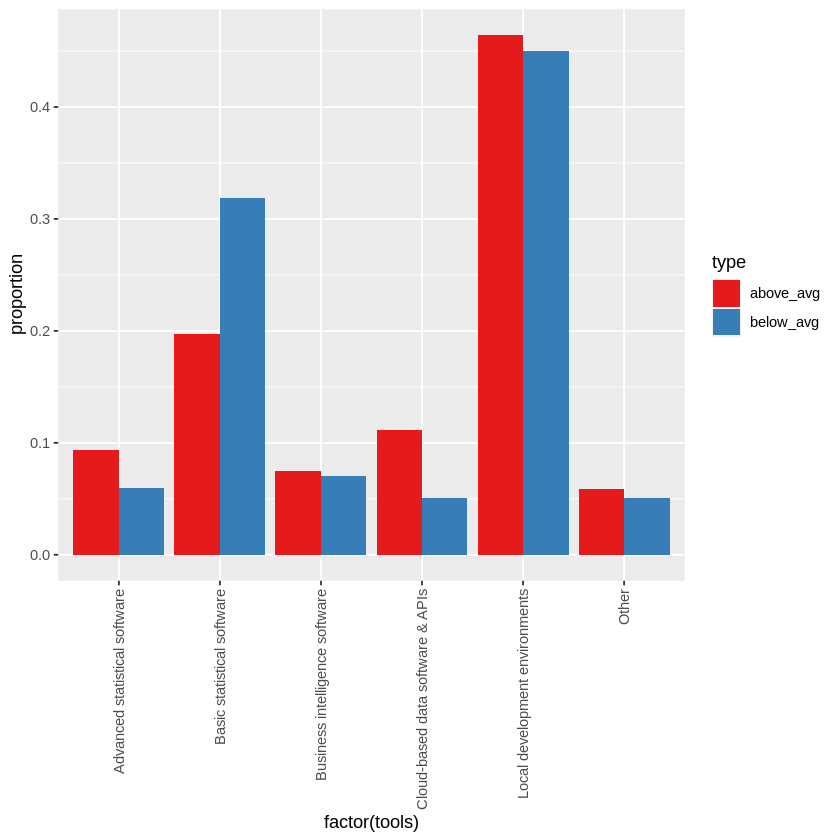

In [ ]:
tools_prop = data.frame(type, tools, proportion)
ggplot(tools_prop, aes(factor(tools), proportion, fill = type)) + 
  geom_bar(stat="identity", position = "dodge") + 
  scale_fill_brewer(palette = "Set1") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))